In [1]:
# this version is completed in Mar. 27, 2019

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# start time 0
start_time0 = time.time()

In [4]:
# set some temporary variable
point_y = 0
point_x = 0

index_Pattern = 0

In [5]:
# read the training image
#TIBMP = Image.open("channelied.bmp",'r')
TIBMP = Image.open("channel101.bmp",'r')
# TIBMP = Image.open("exampleTI.bmp",'r')
TIInt = TIBMP.load()
#print(TIBMP.size)
TI_Width = TIBMP.size[0]
TI_Height = TIBMP.size[1]
TI = np.empty((TI_Height,TI_Width))

PhaseNumber = 2;

for point_y in range(TI_Height):
    for point_x in range(TI_Width):
        point_value = float(TIInt[point_x,point_y][0])
        TI[point_y][point_x] = point_value/255;

# print(TI_Width)
# print(TI_Height)
# # the horizontal direction is x-axis and corresponds to the width
# # the vertical direction is y-axis and correspongds to the height
# print("the training image is: ")
# plt.imshow(TI,vmin=0, vmax=1)
# plt.colorbar()  # show color scale
# plt.show()

In [6]:
# start time 1
start_time1 = time.time()

In [7]:
# extract all pattern

template_radius_x = 6 # the size of template is 2*radius+1    the recommended radius of 2D channel simulation is 6
template_radius_y = 6

ExtractPattern_Y = []
ExtractPattern_X = []

PatternAmount = (TI_Height-2*template_radius_y)*(TI_Width-2*template_radius_x) 
PatternSize = (2*template_radius_y+1)*(2*template_radius_x+1) 
# print("The amount of pattern is "+str(PatternAmount)) 
# print("The size of pattern is "+str(PatternSize))

PatternBase = np.empty((PatternAmount,PatternSize))

index_Pattern = 0 
for point_y in range(template_radius_y,TI_Height-template_radius_y): 
    for point_x in range(template_radius_x,TI_Width-template_radius_x): 
        vector = TI[(point_y-template_radius_y):(point_y+template_radius_y+1), (point_x-template_radius_x):(point_x+template_radius_x+1)] 
        vector = vector.reshape((1,PatternSize)) 
        PatternBase[index_Pattern] = vector 
        ExtractPattern_Y.append(point_y) 
        ExtractPattern_X.append(point_x) 
        index_Pattern += 1
# print(type(ExtractPattern_Y))

ExtractPattern_Y = np.array(ExtractPattern_Y) 
ExtractPattern_X = np.array(ExtractPattern_X)
# print(type(ExtractPattern_Y))
# print(PatternBase)

In [8]:
#perform the PCA to calculate the variance distribution and transform the previous data to new feature space
EnergyThreshold = 0.8

pca = PCA(n_components=PatternSize);
pca.fit(PatternBase);
# print("the variance distribution is")
varianceVector = pca.explained_variance_ratio_

# print(type(varianceVector))

#print("the singular values are")
#print(pca.singular_values_)  

#print("the components")
#print(pca.components_)


# print("the dimension reduction result")
PatternBase_Decompose_All = pca.transform(PatternBase)
# print(PatternBase_Decompose_All)
# print(type(PatternBase_Decompose_All))

# varianceSum = np.sum(varianceVector)
# print('the sum of variance is '+str(varianceSum))
# for variance in varianceVector:
#     variance /= varianceSum
# print('the variance vector is '+str(varianceVector))

cumulativeVarianceVector = np.cumsum(varianceVector)
# SelectDimension = np.where(cumulativeVarianceVector > EnergyThreshold)
SelectDimension = np.searchsorted(cumulativeVarianceVector, EnergyThreshold)+1
# print('the cumulative variance is')
# for variance in cumulativeVarianceVector:
#     print(str(variance))
print("The reduced dimension is "+str(SelectDimension))
        
# fig, ax = plt.subplots()
# ax.plot(np.linspace(1,PatternSize,PatternSize),cumulativeVarianceVector,color='r',linewidth=2,label='cumulative Variance')
# ax.legend(loc='lower right')
# ax.set_xticks(np.linspace(0,9,10))
# ax.set_yticks(np.linspace(0,1.1,12))
# ax.set_ylabel('Cumulative Variance')
# ax.set_xlabel('PC dimension')
# ax.tick_params(direction='in')
# plt.rcParams.update({'font.size': 10})
# plt.show()

The reduced dimension is 17


In [9]:
# display the point cloud distribution. A point corresponds to a pattern.
# plt.scatter(PatternBase_Decompose_All[:,0],PatternBase_Decompose_All[:,1], cmap='viridis_r',edgecolors='k', linewidth =0.25)
# plt.xlabel('PC1: '+str(int(100*varianceVector[0]))+'%')
# plt.ylabel('PC2: '+str(int(100*varianceVector[1]))+'%')
# plt.tick_params(direction='in')
# plt.rcParams.update({'font.size': 10})
# plt.show()
# print('the first PC vairalbe is')
# for point_x in range(0,PatternAmount):
#     print(PatternBase_Decompose_All[point_x,0])
# print('\nthe second PC vairalbe is')
# for point_x in range(0,PatternAmount):
#     print(PatternBase_Decompose_All[point_x,1])
# print('\nthe third PC vairalbe is')
# for point_x in range(0,PatternAmount):
#     print(PatternBase_Decompose_All[point_x,2])

# plt.scatter(PatternBase_Decompose_All[:,2],PatternBase_Decompose_All[:,3], cmap='viridis_r',edgecolors='k', linewidth =0.25, vmin=-1, vmax=3)
# plt.show()
# plt.scatter(PatternBase_Decompose_All[:,4],PatternBase_Decompose_All[:,5], cmap='viridis_r',edgecolors='k', linewidth =0.25, vmin=-1, vmax=3)
# plt.show()
# plt.scatter(PatternBase_Decompose_All[:,6],PatternBase_Decompose_All[:,7], cmap='viridis_r',edgecolors='k', linewidth =0.25, vmin=-1, vmax=3)
# plt.show()
# plt.scatter(PatternBase_Decompose_All[:,8],PatternBase_Decompose_All[:,9], cmap='viridis_r',edgecolors='k', linewidth =0.25, vmin=-1, vmax=3)
# plt.show()

In [10]:
# Carry out the Dimension Reduction
#SelectDimension = 70;   # this code is used to artificially determine the dimension
Pattern_Decompose_Partial = PatternBase_Decompose_All[0:PatternAmount,0:SelectDimension]
# print(Pattern_Decompose_Partial)
# print('the size of PC feature matrix is'+str(Pattern_Decompose_Partial.shape))

In [11]:
# calculate the biggest distance within the pattern set
MaxInnerRadius = 0;

#find the center of all patterns
kmeans_1 = KMeans(n_clusters= 1, random_state=0).fit(Pattern_Decompose_Partial);
KmeansCenter_1 = kmeans_1.cluster_centers_
# print(KmeansCenter_1)
# print('the size of k means center is'+str(KmeansCenter_1.shape))
# plt.scatter(Pattern_Decompose_Partial[:,0],Pattern_Decompose_Partial[:,1], c=np.ones(PatternAmount),edgecolors='k',cmap='rainbow', linewidth =0.25);
# plt.colorbar()  # show color scale
# plt.show()

euclideanColumnVector = np.linalg.norm(Pattern_Decompose_Partial-KmeansCenter_1,axis=1)
MaxInnerRadius = np.max(euclideanColumnVector)
print('the maximum inner radius is '+ str(MaxInnerRadius))

the maximum inner radius is 6.5142673124407775


height: 1
cluster amount:2


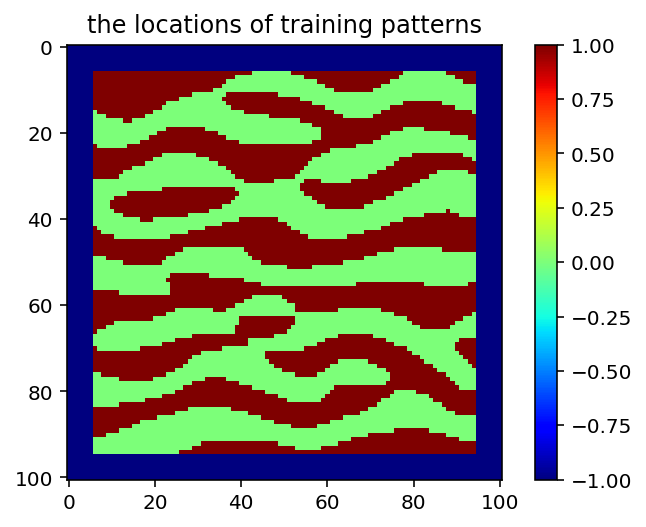

height: 2
cluster amount:4


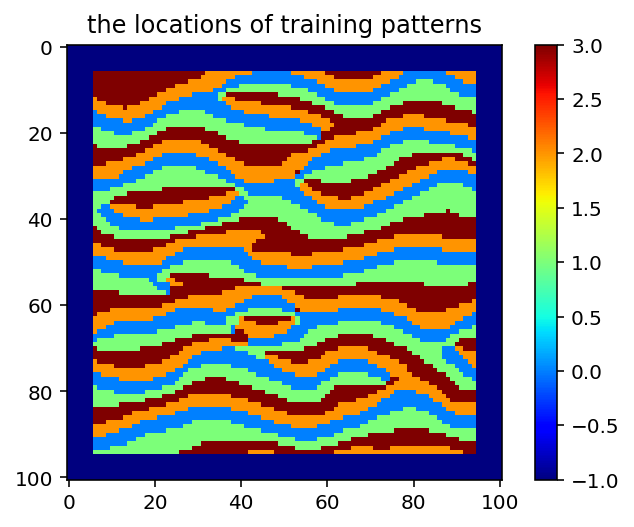

height: 3
cluster amount:8


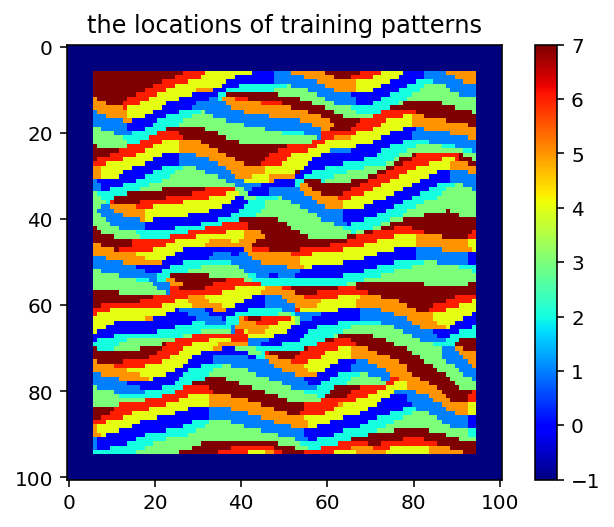

height: 4
cluster amount:16


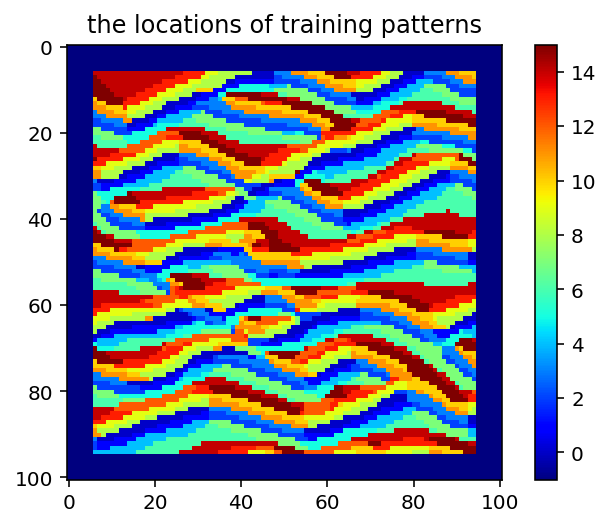

height: 5
cluster amount:32


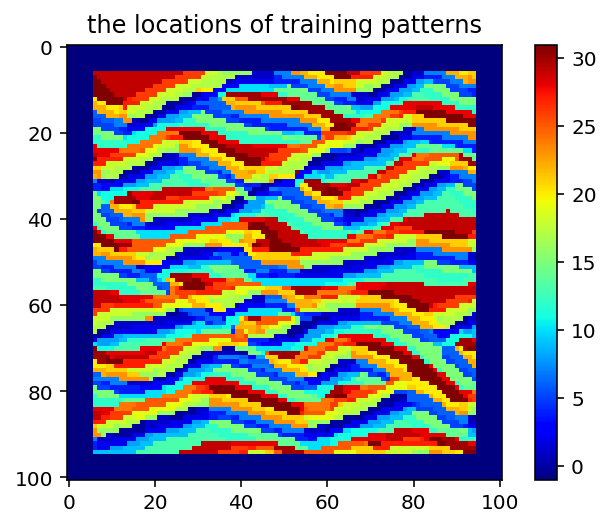

height: 6
cluster amount:64


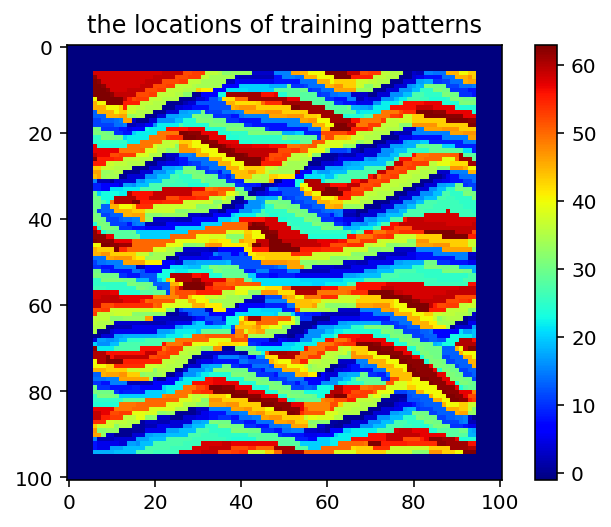

height: 7
cluster amount:128


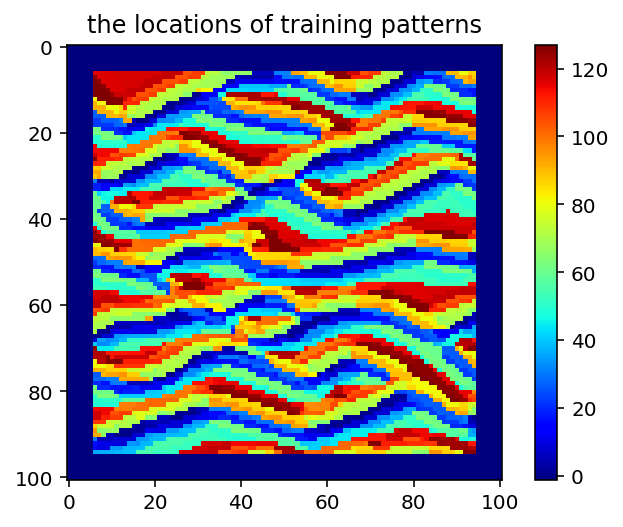

height: 8
cluster amount:256


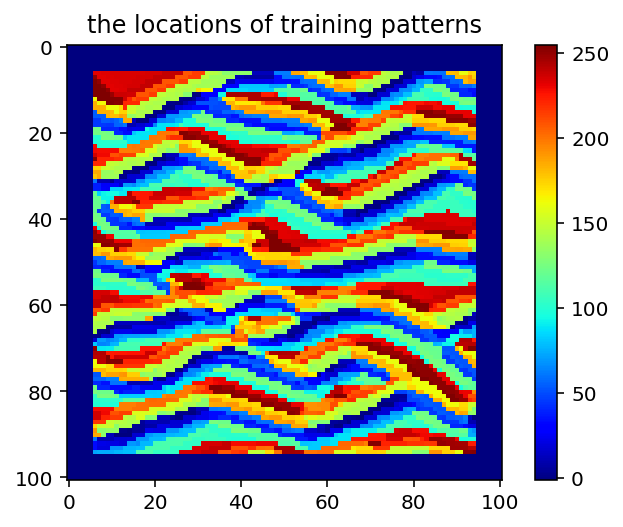

In [12]:
# bulid the cluster tree

TreeHeight_max = 8 # the suitable height of 2D channel simulation is 8

Representative_Y = []
Representative_X = []
InnerRadius = []

treeHeight = 1

clusterAmount_old = 1
clusterIndex_old = 0
clusterAmount_new = 2

clusterResult_old = np.ones(PatternAmount).astype(int)

memberPatternIndex_old = np.linspace(0,PatternAmount-1,PatternAmount).reshape(1,PatternAmount)
memberPatternIndex_old = memberPatternIndex_old.astype(int)
# print(memberPatternIndex_old)

KmeansResult = np.ones(PatternAmount)

for treeHeight in range(1,TreeHeight_max+1):
    print('height: '+str(treeHeight))
    clusterAmount_old = 2**(treeHeight-1)
    clusterAmount_new = 2**treeHeight
    print('cluster amount:'+str(clusterAmount_new))
    
    memberPatternIndex_new = np.full(shape=(clusterAmount_new,PatternAmount),fill_value=-1)
    # print('the shape of new member pattern index matrix is '+str(memberPatternIndex_new.shape))
    # print(memberPatternIndex_new)
    clusterSize = np.empty(clusterAmount_new)
    
    for clusterIndex_old in range(clusterAmount_old):
                
        memberPatternIndex_current = memberPatternIndex_old[clusterIndex_old]
        memberPatternIndex_current = memberPatternIndex_current[memberPatternIndex_current > -1]
        # print(memberPatternIndex_current)
        if(len(memberPatternIndex_current)==0):   # solve empty cluster
            print('empty cluster')
            for clusterIndex_child in range(0,2):
                clusterSize[clusterIndex_old*2+clusterIndex_child] = 0
                Representative_X.append( -1 )
                Representative_Y.append( -1 ) 
                InnerRadius.append( -1.0 )
            continue
        elif(len(memberPatternIndex_current)==1):
            clusterSize[clusterIndex_old*2] = 1
            index_Pattern = (int)(len(Representative_X)/2 - 1)
            print('the len of current cluster is '+str(index_Pattern))
            Representative_X.append( Representative_X[index_Pattern] )
            Representative_Y.append( Representative_Y[index_Pattern] ) 
            InnerRadius.append( InnerRadius[index_Pattern] )
            
            clusterSize[clusterIndex_old*2+1] = 0
            Representative_X.append( -1 )
            Representative_Y.append( -1 ) 
            InnerRadius.append( -1.0 )
            continue
        currentPatternBase = Pattern_Decompose_Partial[memberPatternIndex_current]
        # print('the shape of current clustering PCA matrix is '+str(currentPatternBase.shape))
        
        kmeans = KMeans(n_clusters= 2, random_state=0).fit(currentPatternBase);
        KmeansCenter = kmeans.cluster_centers_  # two centers
        KmeansResult_temporary = kmeans.labels_  # the current cluster result
        
        for clusterIndex_child in range(0,2):
            # assign the index of the first cluster to the new vector
            memberPatternIndex_current = np.where(KmeansResult_temporary == clusterIndex_child)[0]
            # print('the size of the cluster is '+str(memberPatternIndex_current.shape))
            clusterSize[clusterIndex_old*2+clusterIndex_child] = len(memberPatternIndex_current)
            memberPatternIndex_current = memberPatternIndex_old[clusterIndex_old][memberPatternIndex_current]
            KmeansResult[memberPatternIndex_current] = clusterIndex_old*2 + clusterIndex_child
            # print(memberPatternIndex_current)
            memberPatternIndex_current_pad = np.pad(memberPatternIndex_current,pad_width=(0,PatternAmount-len(memberPatternIndex_current)),mode='constant',constant_values=(0,-1))
            # print(memberPatternIndex_current)
            memberPatternIndex_new[clusterIndex_old*2+clusterIndex_child] = memberPatternIndex_current_pad

            if(len(memberPatternIndex_current) == 0):   # solve empty cluster
                # there is no pattern in current cluster
                Representative_X.append( -1 )
                Representative_Y.append( -1 ) 
                InnerRadius.append( -1.0 )
            else:
                # find the actual patterns are closest to first center 
                euclideanRowVector = np.linalg.norm(Pattern_Decompose_Partial-KmeansCenter[clusterIndex_child],axis=1)
                representative = np.argmin(euclideanRowVector)
                Representative_X.append( ExtractPattern_X[representative] )
                Representative_Y.append( ExtractPattern_Y[representative] ) 
                # calculate the inner radius
                InnerRadius.append( np.mean(euclideanRowVector[memberPatternIndex_current]) / MaxInnerRadius )
        
        
    memberPatternIndex_old = memberPatternIndex_new.copy()
    
#     # statistically analyze the size of clusters
#     print('the average size: '+ str(np.mean(clusterSize)))
#     print('the max size: '+ str(np.max(clusterSize)))
#     print('the min size: '+ str(np.min(clusterSize)))
    
    # display the cluster result
#     plt.scatter(Pattern_Decompose_Partial[:,0],Pattern_Decompose_Partial[:,1], c=KmeansResult[:],edgecolors='k',cmap='rainbow', linewidth =0.25)
#     plt.colorbar()  # show color scale
#     plt.show()

      # project the cluster result into the original image
#     extractMap = np.full(shape=(TI_Height,TI_Width),fill_value=-1)
#     for point_y, point_x, cluster in zip(ExtractPattern_Y,ExtractPattern_X,KmeansResult):
#         extractMap[point_y][point_x] = cluster
#     plt.imshow(extractMap,cmap = 'jet')
#     plt.title('the locations of training patterns')
#     plt.colorbar()
#     plt.show()

In [13]:
# end time 0
end_time0 = time.time()

In [14]:
# output the file
Representative_Y = np.array(Representative_Y).reshape(2*clusterAmount_new-2)
Representative_X = np.array(Representative_X).reshape(2*clusterAmount_new-2)
InnerRadius = np.array(InnerRadius).reshape(2*clusterAmount_new-2)
# print(Representative_Y)
file_Y = open("z_channel_python_clusterTree_Representative_Y.txt","w")
file_X = open("z_channel_python_clusterTree_Representative_X.txt","w")
file_Radius = open("z_channel_python_cluster_AverageDistance.txt","w")
for x,y,radius in zip(Representative_X,Representative_Y,InnerRadius):
    file_X.write(str(x)+'\n')
    file_Y.write(str(y)+'\n')
    file_Radius.write(str(radius)+'\n')
file_Y.close()
file_X.close()
file_Radius.close()

KmeansResult_Image = np.full(shape=(TI_Height,TI_Width),fill_value=-1)
KmeansResult_Image[template_radius_y:TI_Height-template_radius_y,template_radius_x:TI_Width-template_radius_x] = KmeansResult.reshape((TI_Height-2*template_radius_y,TI_Width-2*template_radius_x))
# print("the clustered image is: ")
# plt.imshow(KmeansResult_Image,cmap='seismic')
# plt.colorbar()  # show color scale
# plt.show()
KmeansResult_Image = KmeansResult_Image.reshape(TI_Height*TI_Width)
file_KmeansResult = open("z_channel_python_clusterTree_Result.txt","w")
for cluster in KmeansResult_Image:
    file_KmeansResult.write(str(cluster)+'\n')
file_KmeansResult.close()

In [15]:
# end time 1
end_time1 = time.time()

In [16]:
print('the cluster tree construction costs '+str(end_time0 - start_time1))
print('the cluster tree construction and file outputs take '+str(end_time1 - start_time1))
print('1 Read training image; 2 the cluster tree construction; 3 file outputs. All missions consume '+str(end_time1 - start_time0))

the cluster tree construction costs 10.469520568847656
the cluster tree construction and file outputs take 10.54762601852417
1 Read training image; 2 the cluster tree construction; 3 file outputs. All missions consume 10.656973838806152
